In [20]:
#!pip install simple_fpa

In [21]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [22]:
%%capture out
! cd ..; pip install .

In [23]:
print((out.stdout.split('\n')[-2]))

In [24]:
from simple_fpa import Model
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
})

rcParams['figure.figsize'] = 7, 7
rcParams['figure.dpi'] = 150

In [25]:
df = pd.read_csv('../data/haile_data_prepared.csv', index_col=0)

In [26]:
model = Model(data = df, auction_ids = ['auctionid'], bids = 'actual_bid')
model.count_bidders_by_auction_id()
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']

In [27]:
model.fit(cont_covs, disc_covs, 'multiplicative')
#model.summary()

In [28]:
model.trim_residuals(5)
model.calibrate()
model.predict()
#model.plot_stats()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 4.260e+04
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        22:58:14   Log-Likelihood:                -3419.1
No. Observations:               54682   AIC:                             6932.
Df Residuals:                   54635   BIC:                             7351.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1

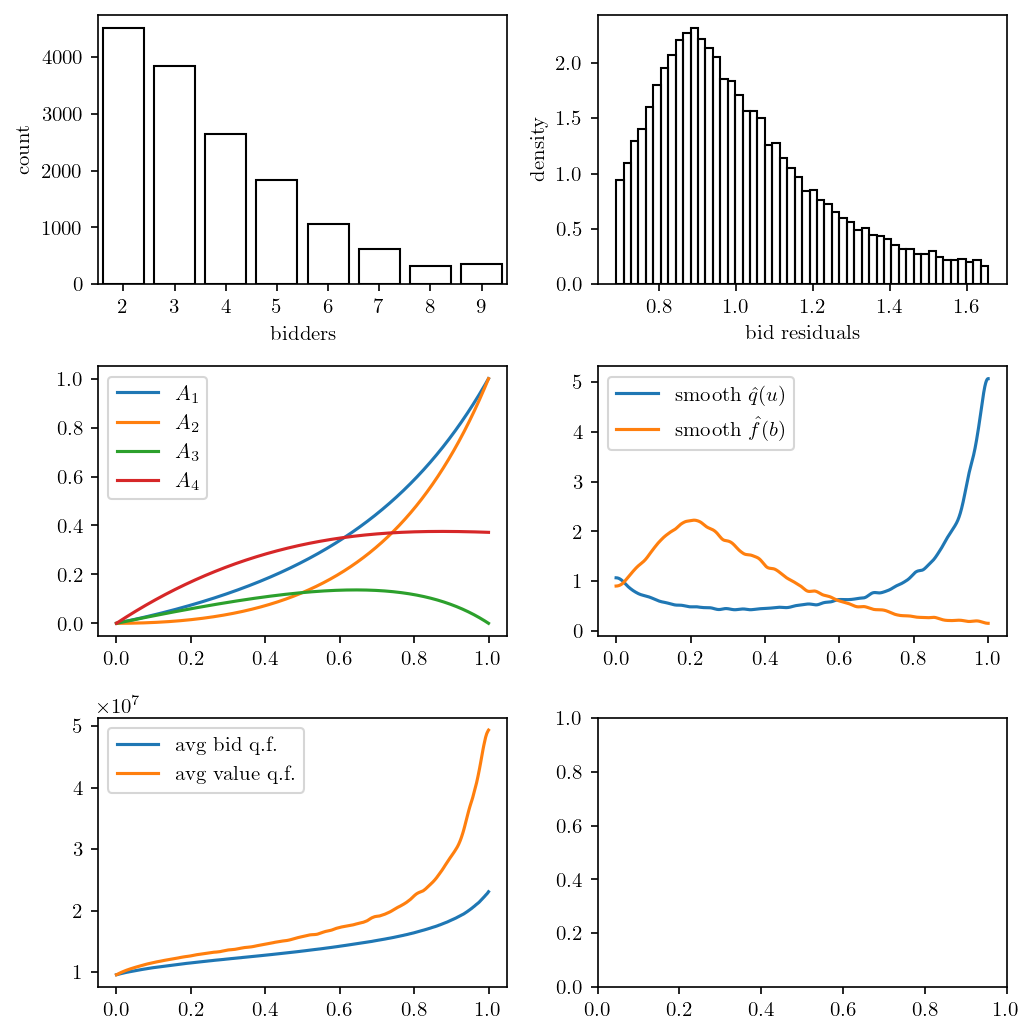

In [29]:
model.fit_predict()